In [2]:
library(tidyverse)
library(ggplot2)

library(lsa) #cosine

Helper function

In [3]:
cosine_matrix = function(raw_data){
    # dim*dim matrix caculated by cosine similarity
    n <- nrow(raw_data)  # raw_data is an n x n matrix, 159*dimensions
    # create an empty matrix to store cosine similarity
    raw_data_cor <- matrix(0, nrow = n, ncol = n)
    colnames(raw_data_cor) <- rownames(raw_data)
    rownames(raw_data_cor) <- rownames(raw_data)
    # calculate the cosine similarity of the upper triangular part
    for (i in 1:(n - 1)) {
        for (j in (i + 1):n) {
            cosine_value <- cosine(as.numeric(raw_data[i, ]), as.numeric(raw_data[j, ]))
            raw_data_cor[i, j] <- cosine_value
        }
    }
    # symmetrically fill the cosine similarity in the lower triangular part
    raw_data_cor <- raw_data_cor + t(raw_data_cor)

    # set the diagonal to 1
    diag(raw_data_cor) <- 1
    return(raw_data_cor)
}

lowerTriangle <- function(m){
  return(m[lower.tri(m,diag = FALSE)])
}

# USA

In [12]:
dyadic_usa = read.csv('../Rel_Dyadic/output_data/pca_results/usa_dyadic_loadings_var.csv',row.names=1) 
dims_order = rownames(dyadic_usa)
dyadic_usa_sim = cosine_matrix(dyadic_usa)

triadic_usa = read.csv('../Rel_Triadic/output_data/pca_results/usa_triadic_loadings_var_all_5c.csv',row.names=1) 
triadic_usa = triadic_usa[dims_order,]
triadic_usa_sim = cosine_matrix(triadic_usa)

group_usa = read.csv('../Rel_Group/output_data/pca_results/usa_group_loadings_var_all_5c.csv',row.names=1) 
group_usa = group_usa[dims_order,]
group_usa_sim = cosine_matrix(group_usa)

nondyadic_usa = read.csv('../HSR_concat/Concat_Group_and_Triadic_All/output_data/usa_GTall_loadings_var.csv',row.names=1) 
nondyadic_usa = nondyadic_usa[dims_order,]
nondyadic_usa_sim = cosine_matrix(nondyadic_usa)

In [13]:
source_data = c('dyadic_usa_sim','triadic_usa_sim','group_usa_sim','nondyadic_usa_sim')
sources = list()
for (i in c(1:length(source_data))){
    sources[[i]] = get(source_data[i])
}

source_rsa_cor = matrix(0,ncol=4,nrow=4)
colnames(source_rsa_cor) = source_data
rownames(source_rsa_cor) = source_data

for (i in c(1:(length(source_data)-1))){
    for (j in c((i+1):length(source_data))){
        datax = lowerTriangle(sources[[i]])
        datay = lowerTriangle(sources[[j]])
        source_rsa_cor[i,j] = cor(datax,datay,method='spearman')
    }
}
source_rsa_cor <- source_rsa_cor + t(source_rsa_cor)
diag(source_rsa_cor) <- 1

usa_rsa_cor = source_rsa_cor
write.csv(usa_rsa_cor,'output_data/usa_rsa_cor.csv')
usa_rsa_cor

,dyadic_usa_sim,triadic_usa_sim,group_usa_sim,nondyadic_usa_sim
dyadic_usa_sim,1.0000000,0.6710335,0.7553028,0.7326390
triadic_usa_sim,0.6710335,1.0000000,0.6874608,0.9406679
group_usa_sim,0.7553028,0.6874608,1.0000000,0.8588389
nondyadic_usa_sim,0.7326390,0.9406679,0.8588389,1.0000000


    group_usa_sim nondyadic_usa_sim   triadic_usa_sim 
        0.7553028         0.7326390         0.6710335 


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


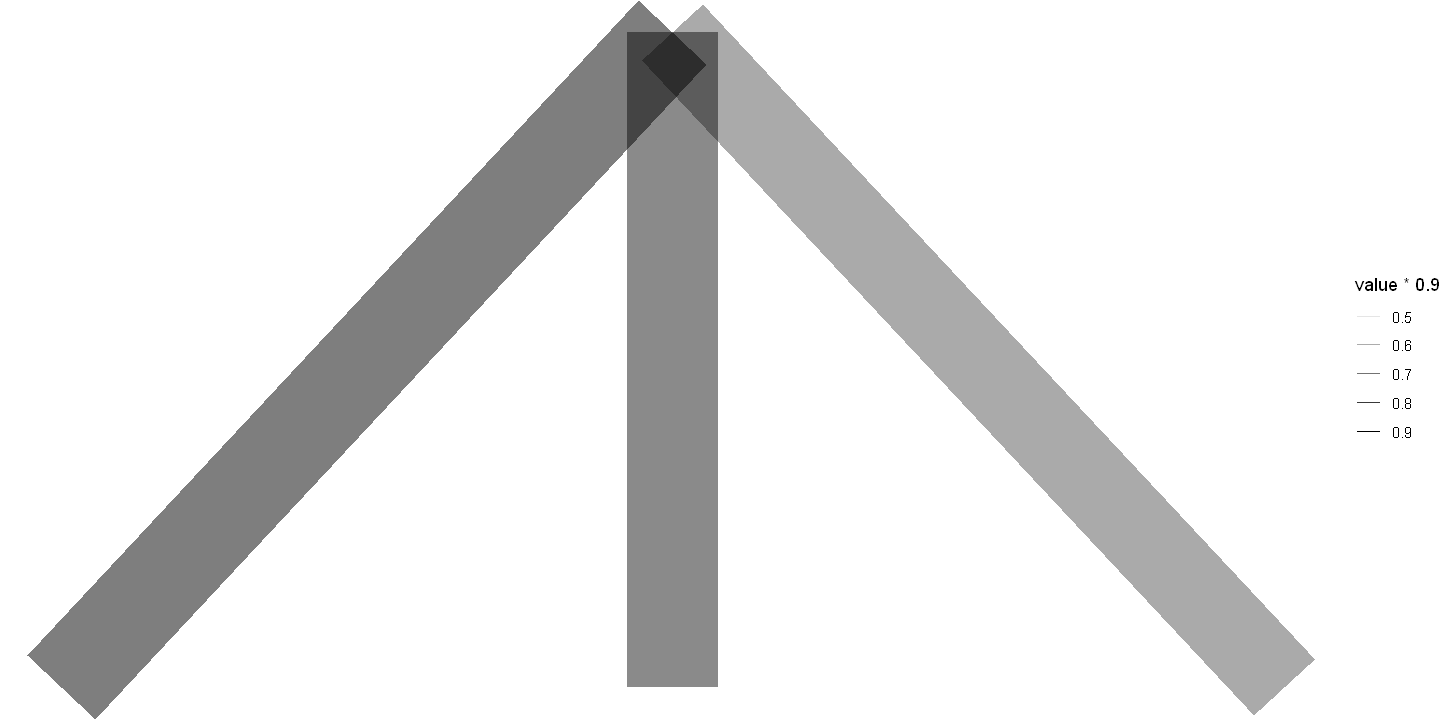

In [14]:
options(repr.plot.width = 12,repr.plot.height=6)
value = usa_rsa_cor['dyadic_usa_sim',
                    c('group_usa_sim','nondyadic_usa_sim','triadic_usa_sim')]
print(value)
data <- data.frame(
  x_start = c(1, 1, 1),
  y_start = c(1, 1, 1),
  x_end = c(0, 1, 2),
  y_end = c(0, 0, 0),
  thickness = value*35
)

ggplot(data, aes(x = x_start, y = y_start, xend = x_end, yend = y_end, size = thickness, alpha = value*0.9)) +
  scale_alpha_continuous(limits = c(0.5, 0.9))+
  geom_segment() +
  scale_size_identity() +
  theme_void()

# CHN

In [15]:
dyadic_chn = read.csv('../Rel_Dyadic/output_data/pca_results/chn_dyadic_loadings_var.csv',row.names=1) 
dims_order = rownames(dyadic_chn)
dyadic_chn_sim = cosine_matrix(dyadic_chn)

triadic_chn = read.csv('../Rel_Triadic/output_data/pca_results/chn_triadic_loadings_var_all_5c.csv',row.names=1) 
triadic_chn = triadic_chn[dims_order,]
triadic_chn_sim = cosine_matrix(triadic_chn)

group_chn = read.csv('../Rel_Group/output_data/pca_results/chn_group_loadings_var_all_5c.csv',row.names=1) 
group_chn = group_chn[dims_order,]
group_chn_sim = cosine_matrix(group_chn)

nondyadic_chn = read.csv('../HSR_concat/Concat_Group_and_Triadic_All/output_data/chn_GTall_loadings_var_all.csv',row.names=1) 
nondyadic_chn = nondyadic_chn[dims_order,]
nondyadic_chn_sim = cosine_matrix(nondyadic_chn)

In [16]:
source_data = c('dyadic_chn_sim','triadic_chn_sim','group_chn_sim','nondyadic_chn_sim')
sources = list()
for (i in c(1:length(source_data))){
    sources[[i]] = get(source_data[i])
}

source_rsa_cor = matrix(0,ncol=4,nrow=4)
colnames(source_rsa_cor) = source_data
rownames(source_rsa_cor) = source_data

for (i in c(1:(length(source_data)-1))){
    for (j in c((i+1):length(source_data))){
        datax = lowerTriangle(sources[[i]])
        datay = lowerTriangle(sources[[j]])
        source_rsa_cor[i,j] = cor(datax,datay,method='spearman')
    }
}
source_rsa_cor <- source_rsa_cor + t(source_rsa_cor)
diag(source_rsa_cor) <- 1

chn_rsa_cor = source_rsa_cor
write.csv(chn_rsa_cor,'output_data/chn_rsa_cor.csv')
chn_rsa_cor

,dyadic_chn_sim,triadic_chn_sim,group_chn_sim,nondyadic_chn_sim
dyadic_chn_sim,1.0000000,0.8770202,0.8431335,0.8902595
triadic_chn_sim,0.8770202,1.0000000,0.8565563,0.9600388
group_chn_sim,0.8431335,0.8565563,1.0000000,0.9596146
nondyadic_chn_sim,0.8902595,0.9600388,0.9596146,1.0000000


    group_chn_sim nondyadic_chn_sim   triadic_chn_sim 
        0.8431335         0.8902595         0.8770202 


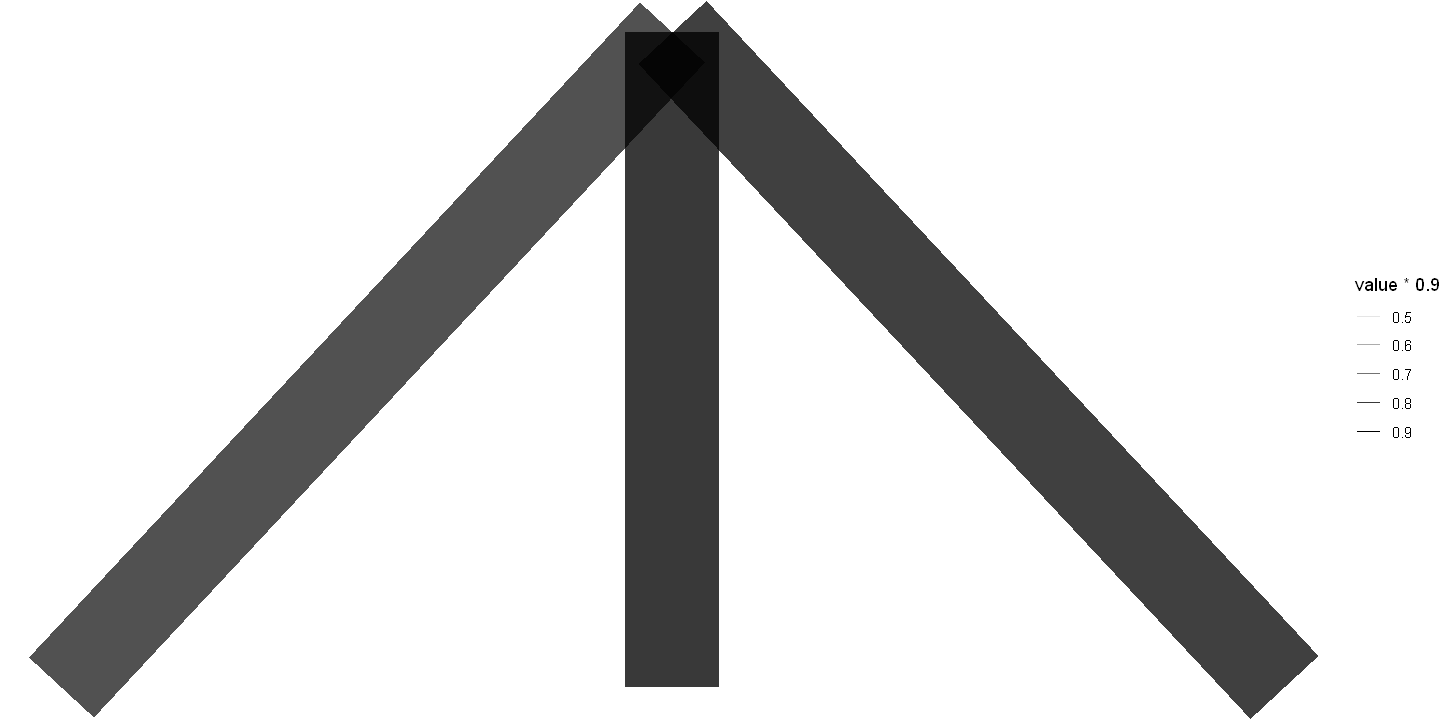

In [17]:
options(repr.plot.width = 12,repr.plot.height=6)
value = chn_rsa_cor['dyadic_chn_sim',
                    c('group_chn_sim','nondyadic_chn_sim','triadic_chn_sim')]
print(value)
data <- data.frame(
  x_start = c(1, 1, 1),
  y_start = c(1, 1, 1),
  x_end = c(0, 1, 2),
  y_end = c(0, 0, 0),
  thickness = value*30
)

ggplot(data, aes(x = x_start, y = y_start, xend = x_end, yend = y_end, size = thickness, alpha = value*0.9)) +
  scale_alpha_continuous(limits = c(0.5, 0.9))+
  geom_segment() +
  scale_size_identity() +
  theme_void()